In [1]:
!pip install scipy

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

In [3]:
bike_sharing_df = pd.read_csv('archive/bike_sharing_daily.csv')
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_sharing_df['dteday'] = pd.DatetimeIndex(bike_sharing_df['dteday'])
bike_sharing_df['dteday'].head()

0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]

In [6]:
np.corrcoef(bike_sharing_df['temp'],
           bike_sharing_df['cnt'])

array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

In [7]:
bike_sharing_df['temp'].corr(bike_sharing_df['cnt'])

0.6274940090334918

In [8]:
#pandas ans numpy evaluates the linear relationship between two confinuous variables
pearsonr(bike_sharing_df['temp'],
        bike_sharing_df['cnt'])

(0.627494009033492, 2.8106223975907754e-81)

In [9]:
#based on the ranks of the variables rather than actual raw values, usually used with ordinal data
spearmanr(bike_sharing_df['temp'],
         bike_sharing_df['cnt'])

SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

Text(0.5, 1.0, 'Count of bikes rented per temprature')

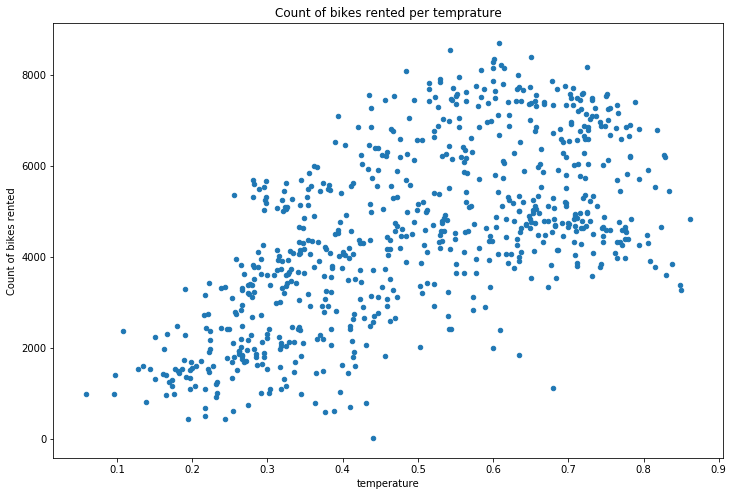

In [14]:
bike_sharing_df.plot.scatter(x='temp',y='cnt',figsize=(12,8))
plt.xlabel('temperature')
plt.ylabel('Count of bikes rented')
plt.title('Count of bikes rented per temprature')

In [16]:
np.corrcoef(bike_sharing_df['workingday'],
           bike_sharing_df['registered'])

array([[1.        , 0.30390712],
       [0.30390712, 1.        ]])

In [17]:
pearsonr(bike_sharing_df['workingday'],bike_sharing_df['registered'])

(0.30390711704591733, 4.3815710893705565e-17)

Text(0, 0.5, 'Count of Registered Users')

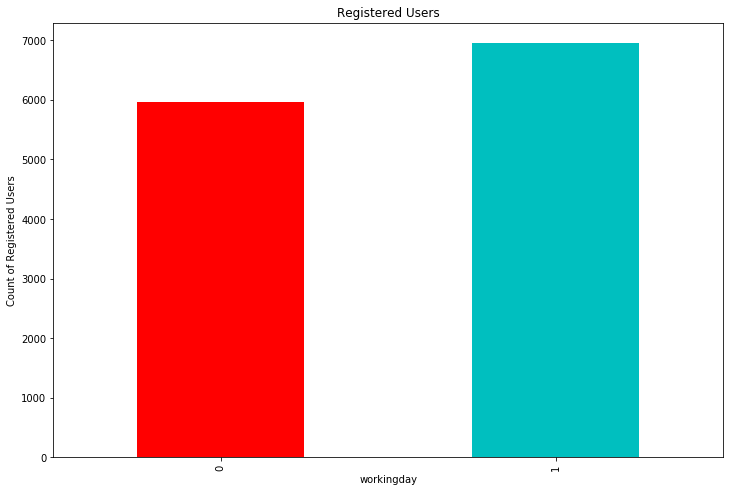

In [31]:
ax = plt.subplot()

bike_sharing_df.groupby('workingday').max()['registered'].plot(kind='bar',figsize=(12,8),ax=ax,color=('r','c'))

plt.title('Registered Users')
plt.ylabel('Count of Registered Users')

Text(0.5, 1.0, 'Casual users')

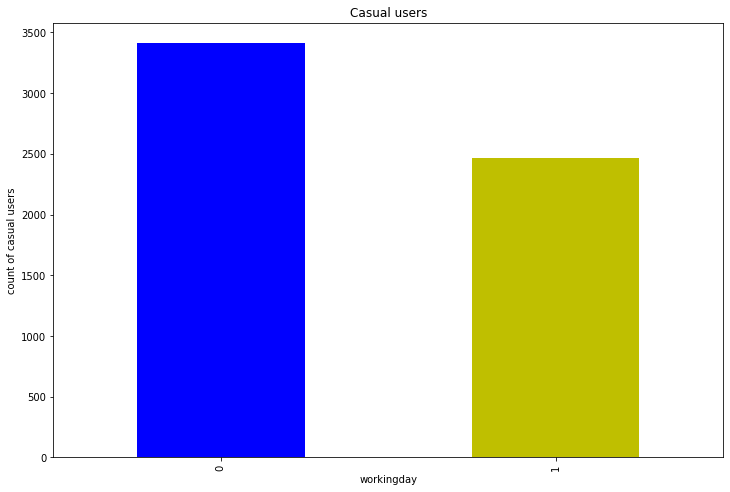

In [35]:
bike_sharing_df.groupby('workingday').max()['casual'].plot.bar(x='workingday',y='casual',figsize=(12,8),color=('b','y'))

plt.ylabel('count of casual users')
plt.title('Casual users')

In [36]:
spearmanr(bike_sharing_df['windspeed'],
         bike_sharing_df['cnt'])

SpearmanrResult(correlation=-0.21719701027268842, pvalue=2.9694272867448183e-09)

In [37]:
np.corrcoef(bike_sharing_df['windspeed'],
           bike_sharing_df['cnt'])

array([[ 1.      , -0.234545],
       [-0.234545,  1.      ]])

Text(0, 0.5, 'Count of bikes')

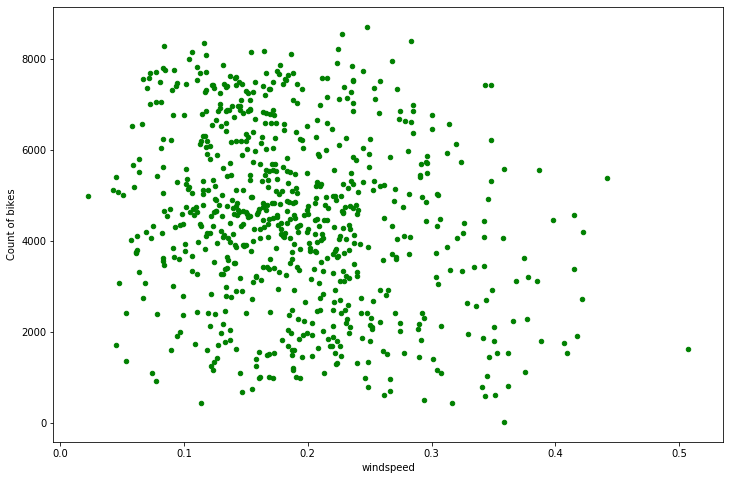

In [39]:
bike_sharing_df.plot(kind='scatter',x='windspeed',y='cnt',figsize=(12,8),color='g')
plt.xlabel('windspeed')
plt.ylabel('Count of bikes')

In [40]:
bike_sharing_df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


Text(0.5, 1.2, 'Correlation')

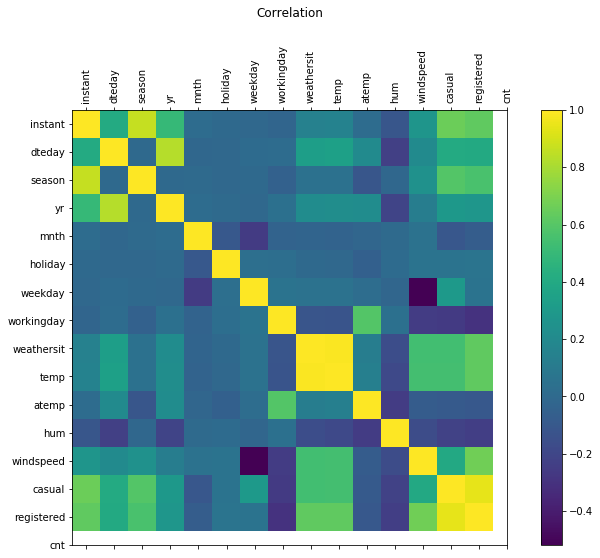

In [52]:
plt.figure(figsize=(12,8))

plt.matshow(bike_sharing_df.corr(),fignum=False,aspect='equal')

columns = len(bike_sharing_df.columns)

plt.xticks(range(columns),bike_sharing_df.columns)
plt.yticks(range(columns),bike_sharing_df.columns)

plt.colorbar()
plt.xticks(rotation=90)
plt.title('Correlation',y=1.2)

In [53]:
!pip install yellowbrick

     |████████████████████████████████| 269 kB 806 kB/s eta 0:00:01


In [55]:
target = bike_sharing_df.cnt
features = bike_sharing_df.drop(['casual','registered','cnt','dteday'],axis=1)

In [56]:
from yellowbrick.target import FeatureCorrelation

feature_name = list(features.columns)
feature_name

['instant',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

/home/abdulkader/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


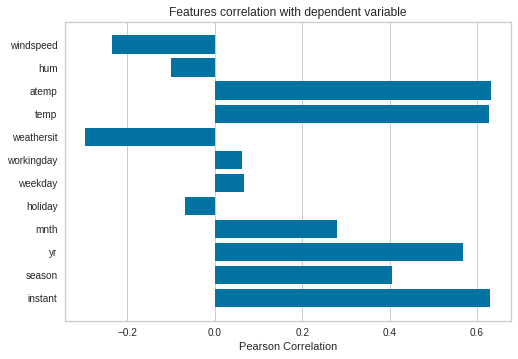

In [58]:
visualizer  = FeatureCorrelation(labels = feature_name)
visualizer.fit(features,target)
visualizer.poof()